# Hypothesis Testing in Python

## Hypothesis Testing Fundamentals

### Hypothesis Tests and Z-Scores

In [2]:
import pandas as pd
stack_overflow = pd.read_feather(r'./data/stack_overflow.feather')
stack_overflow.head(3)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30


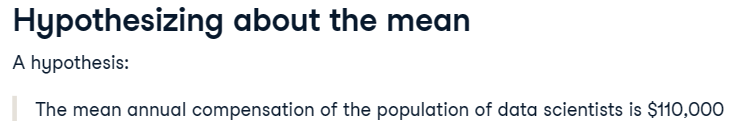

In [3]:
mean_comp_samp = stack_overflow['converted_comp'].mean()
print(f'Calculated mean of compensation {mean_comp_samp:,.2f}')

Calculated mean of compensation 119,574.72


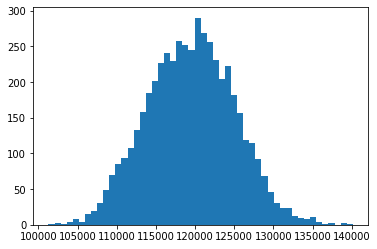

In [4]:
# Generate a bootstrap distribution
import numpy as np
import matplotlib.pyplot as plt
so_boot_distn = [np.mean(stack_overflow.sample(frac=1, replace=True)['converted_comp']) for _ in range(5000)]
plt.hist(so_boot_distn, bins=50)
plt.show()

In [5]:
# Standard Error
std_error = np.std(so_boot_distn, ddof=1)
print(std_error)

5561.904598540321


#### Z Score

$$z = {sample stat - hypoth.param.value \over standard error}

In [6]:
# Z Score
mean_comp_hyp = 110000
z_score = (mean_comp_samp - mean_comp_hyp)/std_error
print(z_score)

1.7214817715863615


In [7]:
late_shipments = pd.read_feather(r'./data/late_shipments.feather')
late_shipments.head(3)

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.0,4.8,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57


In [8]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late']=='Yes').mean()

# Print the results
print(late_prop_samp*100)

6.1


In [9]:
late_shipments_boot_distn = [np.mean(late_shipments.sample(frac=1, replace=True)['late_delivery']) for _ in range(5000)]
late_prop_hyp = 0.06
std_error = np.std(late_shipments_boot_distn, ddof=1)
print(std_error)

0.007670551233858376


In [10]:
z_score = (late_prop_samp - late_prop_hyp) / std_error
print(z_score)

0.13036872703306218


### p_values

In [11]:
val = 'facebookfac'
dashes = []
n=2
hyp=0
for _ in val[::-1]:
    if hyp==n:
        dashes.extend(['-',_])
        hyp=1
    else:
        dashes.append(_)
        hyp += 1
''.join(dashes[::-1])


'f-ac-eb-oo-kf-ac'

In [12]:
def divide_string(string, parts):
    substrings = [string[::-1][i:i + parts] for i in range(0, len(string), parts)]

    if len(substrings) > parts:
        substrings[-2] += substrings[-1]
        substrings.pop()

    return '-'.join(substrings)

string = "paper"
parts = 3

result = divide_string(string, parts)
print(result)

rep-ap


In [13]:
len(string)

5

In [14]:
import textwrap as tw
string='computercomputercomp'
N=6
lst = '-'.join([_[::-1] for _ in tw.wrap(string[::-1], N)[::-1]])


In [15]:
lst = ['12.0.4.1', '3.3.1.12', '12.0.3.1', '3.1', '12.1', '4.5', '4.4.1', '3.3.1.3', '3.2.1']
result=[]
for number in lst:
    int_parts = [int(part) for part in str(number).split('.')]
    result.append(int_parts)
sorted(result)

[[3, 1],
 [3, 2, 1],
 [3, 3, 1, 3],
 [3, 3, 1, 12],
 [4, 4, 1],
 [4, 5],
 [12, 0, 3, 1],
 [12, 0, 4, 1],
 [12, 1]]

In [16]:
# version_strings = [ 12.0.4.1, 3.3.1.12, 12.0.3.1, 3.1, 12.1, 4.5, 4.4.1, 3.3.1.3, 3.2.1]

# Function to convert version string to a list of integers
def version_key(version):
    return [int(part) for part in str(version).split('.') if part]

# Sort the list using the custom key function
sorted_versions = sorted(lst, key=version_key)

# Output the sorted list
print(sorted_versions)

['3.1', '3.2.1', '3.3.1.3', '3.3.1.12', '4.4.1', '4.5', '12.0.3.1', '12.0.4.1', '12.1']


### p-values

In [17]:
z_score = (late_prop_samp-late_prop_hyp)/std_error
z_score

0.13036872703306218

In [18]:
import scipy.stats as scs
p_value = 1 - scs.norm.cdf(z_score, loc=0, scale=1)
p_value

0.4481373538060769

In [19]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.046, 0.077)


In [20]:
late_prop_hyp

0.06

When you have a confidence interval width equal to one minus the significance level,<br>
if the hypothesized population parameter is within the confidence interval,<br>
you should <b>fail to reject</b> the null hypothesis.

## Two-Sample and ANOVA Tests

### Performing T Tests

In [21]:
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [22]:
[_ for _ in stack_overflow.columns if _.startswith('age')]

['age', 'age_1st_code', 'age_first_code_cut', 'age_cat']

In [23]:
stack_overflow['age_first_code_cut'].unique()

array(['adult', 'child'], dtype=object)

#### Hypotheses
<i>H0:</i> Them mean compensation (in USD) is same for those that coded first as a child and 
those that coded first as an adult.<br>
<i>H1:</i> Them mean compensation (in USD) is greater for those that coded first as a child and those that coded first as an adult.

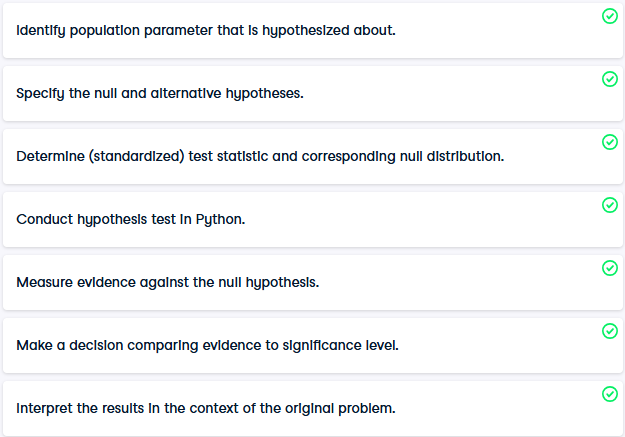

In [24]:
print(f"{stack_overflow['converted_comp'].mean():,.2f}")

119,574.72


In [25]:
stack_overflow.groupby(by='age_first_code_cut')['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [26]:
# https://katex.org/docs/supported.html

#### Z Score

$$z = {sample stat - hypoth.param.value \over standard error}

$$t = {difference in sample stats - difference in population parameters \over standard error}

$$t = {(\bar{x}_{child} - \bar{x}_{adult}) - (\mu_{child}-\mu_{adult}) \over SE(\bar{x}_{child}-\bar{x}_{adult})}


#### Standard Error
$SE(\bar{x}_{child}-\bar{x}_{adult})$ $\approx$ $\sqrt{\frac{s^2_{\text{child}}}{n_{\text{child}}} + \frac{s^2_{\text{adult}}}{n_{\text{adult}}}}$


As <i>Ho</i> is $\mu_{child}-\mu_{adult}=0$

In [27]:
xbar = stack_overflow.groupby(by='age_first_code_cut')['converted_comp'].mean()
s = stack_overflow.groupby(by='age_first_code_cut')['converted_comp'].std()
n = stack_overflow.groupby(by='age_first_code_cut')['converted_comp'].count()
print(xbar, s, n)

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64 age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64 age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64


In [28]:
import numpy as np
numerator =xbar['child']-xbar['adult']
denominator = np.sqrt(s['child']**2 / n['child'] + s['adult']**2/n['adult'])
t_stat = numerator/denominator
t_stat

1.8699313316221844

### Calculating p-values from t-statistics

In [29]:
print(t_stat, n['child'], n['adult'])

1.8699313316221844 885 1376


In [30]:
degrees_of_freedom = n['child']+n['adult']-2
degrees_of_freedom

2259

In [31]:
import scipy
p_value = 1-scipy.stats.t.cdf(t_stat, df=degrees_of_freedom)
p_value

0.030811302165157595

### Paired t-tests

In [32]:
repub_votes_potus_08_12 = pd.read_feather(r'./data/repub_votes_potus_08_12.feather')
repub_votes_potus_08_12.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


#### Hypotheses <br>
Question: Was the percentage of Republican candidate votes lower in 2008 that 2012?<br>
$H_0: \mu_{2008} - \mu_{2012} = 0$ <br>
$H_A: \mu_{2008} - \mu_{2012} < 0$

<Axes: >

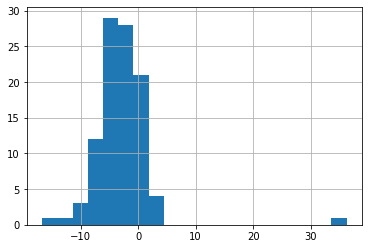

In [33]:
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
import matplotlib.pyplot as plt
sample_data['diff'].hist(bins=20)

In [34]:
xbar = sample_data['diff'].mean()
xbar

-2.877109041242944

#### New Hypotheses
$H_0: \mu_{diff} = 0$ <br>
$H_A: \mu_{diff} < 0$ <br>

$t = \bar{x}_{diff} - \mu_{diff} \over \sqrt{\frac{s^2_{\text{diff}}}{n_{\text{diff}}} }$

$df = n_{diff}-1$

In [35]:
n_diff = len(sample_data)
s_diff = sample_data['diff'].std()
t_stat = (xbar-0) / np.sqrt(s_diff**2/n_diff)
print(n_diff, s_diff, t_stat)

100 5.136737887231852 -5.601043121928489


In [36]:
p_value = scipy.stats.t.cdf(t_stat, df=n_diff-1)
p_value

9.572537285272411e-08

In [37]:
# !pip install pingouin
import pingouin

In [38]:
pingouin.ttest(
  x=sample_data['diff'],
  y=0,
  alternative="less"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


In [39]:
pingouin.ttest(
  x=sample_data['repub_percent_08'],
  y=sample_data['repub_percent_12'],
  paired=True,
  alternative="less"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


In [40]:
pingouin.ttest(
  x=sample_data['repub_percent_08'],
  y=sample_data['repub_percent_12'],
  paired=False, # The default
  alternative="less"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


### ANOVA tests

In [41]:
stack_overflow['job_sat'].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

C:\Users\1270816\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


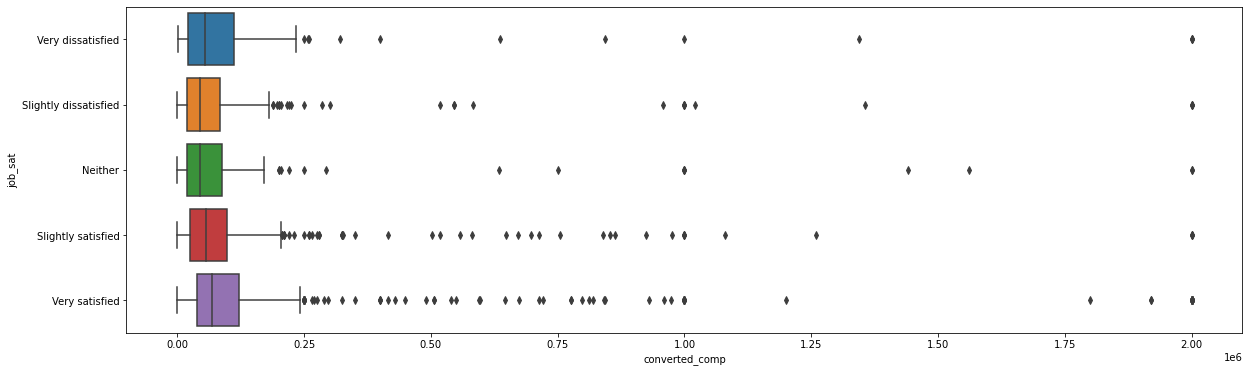

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.boxplot(
  data=stack_overflow,
  x='converted_comp',
  y='job_sat'
)
plt.show()

## Proportion Tests

### One-sample proportion tests

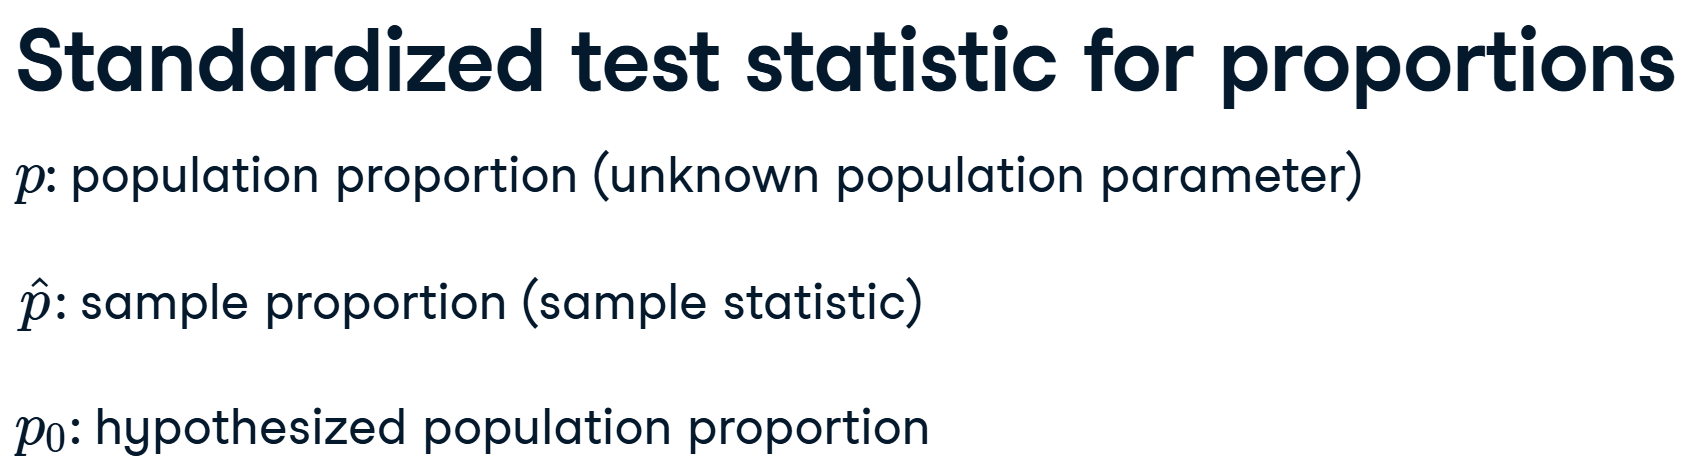

In [43]:
stack_overflow.head(3)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30


In [44]:
stack_overflow['age_cat'].value_counts(normalize=True)

age_cat
Under 30       0.535604
At least 30    0.464396
Name: proportion, dtype: float64

In [47]:
alpha = 0.01
p_hat = (stack_overflow['age_cat']=='Under 30').mean()
p_0 = 0.50
n = len(stack_overflow)
print(f'alpha=={alpha}, p_hat=={p_hat}, p_0=={p_0}, n=={n}')

alpha==0.01, p_hat==0.5356037151702786, p_0==0.5, n==2261


$$
z = \frac{p^-p_{0}} {\sqrt{p_{0}*(1-p_{0})/n}}
$$

In [48]:
numerator = p_hat-p_0
denominator = np.sqrt(p_0*(1-p_0)/n)
z_score = numerator/denominator
z_score

3.385911440783663

In [52]:
from scipy.stats import norm
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


### Two-sample proportion tests

In [62]:
pd.options.display.max_columns = 99
late_shipments.head(2)

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,25.0,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72


In [61]:
late_shipments[late_shipments['late']=='Yes']

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
44,65081.0,Vietnam,PMO - US,Direct Drop,EXW,Air,1.0,Yes,ARV,Adult,HETERO LABS LIMITED,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30.0,14016.0,147168.00,10.50,0.35,Hetero Unit III Hyderabad IN,Yes,1955.0,6194.69,expensive,151.29
65,13926.0,South Africa,PMO - US,Direct Drop,DDP,Air,1.0,Yes,ARV,Adult,CIPLA LIMITED,"Tenofovir Disoproxil Fumarate 300mg, tablets, ...",Tenofovir Disoproxil Fumarate,Generic,300mg,Tablet,30.0,19992.0,156337.44,7.82,0.26,"Cipla, Goa, India",Yes,1378.0,3646.10,reasonable,337.06
68,25830.0,South Africa,PMO - US,Direct Drop,DDP,Air,1.0,Yes,ARV,Pediatric,Aurobindo Pharma Limited,"Lamivudine 10mg/ml, oral solution w/syringe, B...",Lamivudine,Generic,10mg/ml,Oral solution,240.0,11640.0,34920.00,3.00,0.01,"Aurobindo Unit III, India",Yes,4386.0,12917.30,expensive,75.29
78,47625.0,South Africa,PMO - US,Direct Drop,DDP,Air,1.0,Yes,ARV,Adult,CIPLA LIMITED,"Tenofovir Disoproxil Fumarate 300mg, tablets, ...",Tenofovir Disoproxil Fumarate,Generic,300mg,Tablet,30.0,54247.0,424211.54,7.82,0.26,"Cipla, Goa, India",Yes,3728.0,3646.13,reasonable,914.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,53659.0,Zambia,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2910.0,232800.00,80.00,0.80,"Alere Medical Co., Ltd.",Yes,2910.0,21684.99,expensive,287.97
945,4198.0,Vietnam,PMO - US,Direct Drop,FCA,Air,1.0,Yes,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120.0,2000.0,164400.00,82.20,0.68,ABBVIE Ludwigshafen Germany,Yes,513.0,5866.31,expensive,263.04
976,42655.0,Kenya,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,6636.0,530880.00,80.00,0.80,Inverness Japan,Yes,1036.0,11163.27,expensive,1144.58
978,60168.0,South Africa,PMO - US,Direct Drop,DDP,Air,1.0,Yes,ARV,Adult,CIPLA LIMITED,"Tenofovir Disoproxil Fumarate 300mg, tablets, ...",Tenofovir Disoproxil Fumarate,Generic,300mg,Tablet,30.0,64771.0,506509.22,7.82,0.26,"Cipla, Goa, India",Yes,4398.0,5298.03,expensive,1092.03


In [73]:
p_hats = late_shipments.groupby(by='freight_cost_groups')['late'].value_counts()
p_hats

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: count, dtype: int64

In [85]:
late_shipments.groupby(by='freight_cost_groups')['late'].value_counts(normalize=True)

freight_cost_groups  late
expensive            No      0.920904
                     Yes     0.079096
reasonable           No      0.964835
                     Yes     0.035165
Name: proportion, dtype: float64

In [74]:
total = 489+42+439+16
exp_yes = 42/total
rea_yes = 16/total
print(total, exp_yes, rea_yes)


986 0.04259634888438134 0.016227180527383367


In [78]:
import statsmodels as sm
from statsmodels.stats.proportion import proportions_ztest

In [93]:
proportions_ztest(count=58, nobs=total, alternative='larger')

ValueError: value must be provided for a 1-sample test

In [83]:
import scipy
scipy.stats.norm.cdf(3.19)

0.9992886360313546

In [92]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([late_by_freight_cost_group.xs('Yes', level=1)['expensive'], late_by_freight_cost_group.xs('Yes', level=1)['reasonable']])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([late_by_freight_cost_group['expensive'].sum(), late_by_freight_cost_group['reasonable'].sum()])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(
    count=success_counts,
    nobs=n,
    alternative='larger')


# Print the results
print(stat, p_value)

2.922648567784529 0.001735340002359578


In [91]:
[col for col in late_shipments.columns if col.startswith('freight')]

['freight_cost_usd', 'freight_cost_groups']

### Chi-square test of independence

In [94]:
import pingouin
expected, observed, stats = pingouin.chi2_independence(
  data=stack_overflow,
  x='hobbyist',
  y='age_cat',
  correction=False)
print(stats)

                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.839570  1.0  0.000024  0.088826  0.988205
1        cressie-read  0.666667  17.818114  1.0  0.000024  0.088773  0.988126
2      log-likelihood  0.000000  17.802653  1.0  0.000025  0.088734  0.988069
3       freeman-tukey -0.500000  17.815060  1.0  0.000024  0.088765  0.988115
4  mod-log-likelihood -1.000000  17.848099  1.0  0.000024  0.088848  0.988236
5              neyman -2.000000  17.976656  1.0  0.000022  0.089167  0.988694


In [100]:
stats.iloc[0,4]*100000

2.4033301426850846

In [101]:
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
props

C:\Users\1270816\AppData\Local\Temp\ipykernel_20280\1832155901.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)


job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: proportion, dtype: float64

In [103]:
wide_props = props.unstack()
wide_props

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,0.490566,0.509434
Slightly dissatisfied,0.467836,0.532164
Neither,0.432836,0.567164
Slightly satisfied,0.435294,0.564706
Very satisfied,0.488055,0.511945


<Axes: xlabel='job_sat'>

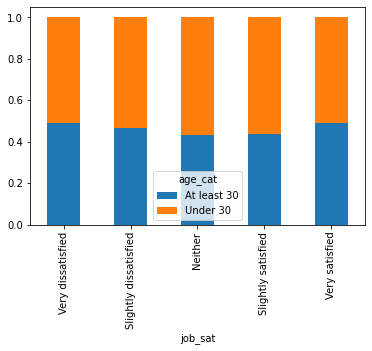

In [104]:
wide_props.plot(kind='bar', stacked=True)

In [105]:
expected, observed, stats = pingouin.chi2_independence(
  data=stack_overflow,
  x='job_sat',
  y='age_cat',
)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


In [108]:
# Calculate Degrees of Freedom
# (No. of response categories - 1) * (No. of explanatory categories -1)
(stack_overflow['job_sat'].nunique()-1) * (stack_overflow['age_cat'].nunique()-1)

4

<Axes: xlabel='age_cat'>

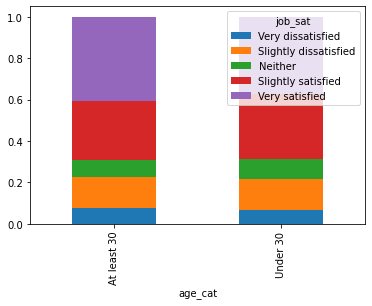

In [109]:
props = stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked=True)

In [111]:
expected, observed, stats = pingouin.chi2_independence(
  data=stack_overflow,
  x='age_cat',
  y='job_sat',
)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


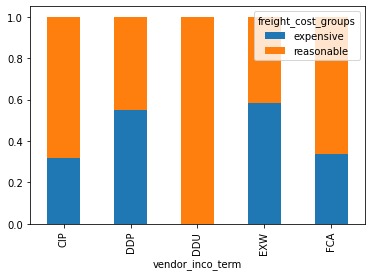

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


C:\Users\1270816\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\1270816\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\1270816\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:7416: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\1270816\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:7416: RuntimeWarnin

In [114]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments,
x='freight_cost_groups',
y='vendor_inco_term')

# Print results
print(stats[stats['test'] == 'pearson']) 

### Chi-square goodness of fit tests

In [117]:
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts = purple_link_counts\
                      .rename_axis('purple_link')\
                      .reset_index(name='n')\
                      .sort_values('purple_link')
purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [119]:
hypothesized = pd.DataFrame({
  'purple_link': ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
  'prop': [1/6, 1/6, 1/2, 1/6]}
)
hypothesized

,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


In [120]:
alpha = 0.01
n_total = len(stack_overflow)
hypothesized['n'] = hypothesized['prop']*n_total
hypothesized

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


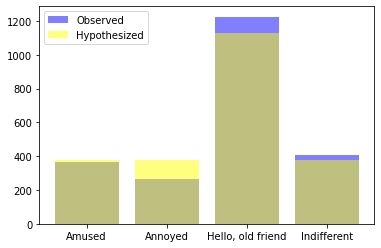

In [131]:
plt.bar(
  x=purple_link_counts['purple_link'],
  height=purple_link_counts['n'],
  color='blue',
  label='Observed',
  alpha=0.5
)
plt.bar(
  x=hypothesized['purple_link'],
  height=hypothesized['n'],
  color='yellow',
  label='Hypothesized',
  alpha=0.5
)
plt.legend()

In [132]:
print(hypothesized)

         purple_link      prop            n
0             Amused  0.166667   376.833333
1            Annoyed  0.166667   376.833333
2  Hello, old friend  0.500000  1130.500000
3        Indifferent  0.166667   376.833333


In [133]:
scipy.stats.chisquare(
  f_obs=purple_link_counts['n'],
  f_exp=hypothesized['n']
)

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

In [145]:
print(f'As pvalue={float(1.1261810719413759e-09):.12f} is much lower than {alpha}.\nSo we conclude that sample distribution is different than hypothesized distribution'  )

As pvalue=0.000000001126 is much lower than 0.01.
So we conclude that sample distribution is different than hypothesized distribution


## Non-Parametric Tests

### Assumptions in hypothesis testing

**Testing sample size**

In order to conduct a <i>hypothesis test</i> and be sure that the result is fair, a sample must meet three requirements: 
<li> it is a random sample of the population
<li> the observations are independent
<li> and there are enough observations.

Of these, only the last condition is easily testable with code.

In [148]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

freight_cost_groups
expensive     531
reasonable    455
Name: count, dtype: int64
True


In [149]:
# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

late
No     939
Yes     61
Name: count, dtype: int64
True


In [151]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: count, dtype: int64
False


In [152]:
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

shipment_mode
Air            906
Ocean           88
Air Charter      6
Name: count, dtype: int64
False


### Non-Parametric Tests (WILCOXON)

In [153]:
sample_dem_data = pd.read_feather(r'./data/dem_votes_potus_12_16.feather')
sample_dem_data.shape

(500, 4)

In [154]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(
    x=sample_dem_data['dem_percent_12'],
    y=sample_dem_data['dem_percent_16'],
    paired=True,
    alternative='two-sided'
)

# Print paired t-test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [155]:
sample_dem_data.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


In [156]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(
    x=sample_dem_data['dem_percent_12'],
    y=sample_dem_data['dem_percent_16']
)

# Print Wilcoxon test results
print(wilcoxon_test_results)

           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816


### Non-parametric ANOVA and unpaired t-tests

**Wilcoxon-Mann-Whitney**

Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

In [157]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(
    x=weight_vs_late_wide['Yes'],
    y=weight_vs_late_wide['No']
)

# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  38145.0   two-sided  0.000014 -0.331902  0.665951


In [158]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(
    data=late_shipments,
    dv='weight_kilograms',
    between='shipment_mode'
)


# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28


The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. Th Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.